### Kallus et al., 2018のbeatを変えたときのOPEの結果の変化

behavior policyはuniform

In [16]:
import pickle
import os

from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from policies import behavior_policy1, behavior_policy2
from utils import _estimate_value_on_n
from methods import continuous_ips, discretized_ips, direct_method_poly, direct_method_rf

In [39]:
def trial(estimate_method, behavior_policy, record=True, output_fname=''):
    if record:
        assert output_fname != '', 'give me output filename(output_fname)'

    estimand_transaction_over_beta = []
    for beta in np.linspace(0, 1.3, 20):
        target_policy = lambda x: beta * x
        ope_estimands = _estimate_value_on_n(estimate_method, b_policy=behavior_policy, t_policy=target_policy, n=300)
        expected_value = 2 * np.power(np.abs(1 - beta), 3/2)
        estimand_transaction_over_beta.append([ope_estimands.mean() - expected_value, ope_estimands.std()])
        
    if record:
        os.makedirs('results/ope_synthe_beta/', exist_ok=True)
        with open(f'results/ope_synthe_beta/{output_fname}.pickle', 'wb') as f:
            pickle.dump(estimand_transaction_over_beta, f)
    return np.array(estimand_transaction_over_beta)

In [40]:
# randomized behavior policy
trial(continuous_ips, behavior_policy=behavior_policy2, record=True, output_fname='continuous_ips');
trial(discretized_ips, behavior_policy=behavior_policy2, record=True, output_fname='discretized_ips');
trial(direct_method_poly, behavior_policy=behavior_policy2, record=True, output_fname='DM_poly');
trial(direct_method_rf, behavior_policy=behavior_policy2, record=True, output_fname='DM_RF');

In [41]:
# conditional behavior policy
trial(continuous_ips, behavior_policy=behavior_policy1, record=True, output_fname='continuous_ips2');
trial(discretized_ips, behavior_policy=behavior_policy1, record=True, output_fname='discretized_ips2');
trial(direct_method_poly, behavior_policy=behavior_policy1, record=True, output_fname='DM_poly2');
trial(direct_method_rf, behavior_policy=behavior_policy1, record=True, output_fname='DM_RF2');

In [31]:
def see_results(settings, show_std=False, show_oracle=False):
    estimand_over_sample_sizes = []
    for fname, _, _ in settings:
        with open(f'results/ope_synthe_beta/{fname}.pickle', 'rb') as f:
            estimands = pickle.load(f)
        estimand_over_sample_sizes.append(np.array(estimands))
        
    beta_samples = np.linspace(0, 1.3, 20)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot()
    ax.set_xlim(0, 1.3)
    ax.set_xlabel('beta values')
    ax.set_ylabel('Regret compared to true policy value')
    if show_oracle:
        plt.hlines(xmin=0, xmax=1.3, y=0, colors='b', linestyles='dashed', label='oracle value')

    for i, estimands in enumerate(estimand_over_sample_sizes):
        fname, color, marker = settings[i]
        mean = estimands[:, 0]
        std_err = estimands[:, 1]
        ax.scatter(beta_samples, mean, color=color, label=fname, marker=marker)
        ax.plot(beta_samples, mean, color=color)
        if show_std:
            ax.fill_between(beta_samples, mean - std_err, mean + std_err, alpha=0.2, color=color)
    plt.legend(loc='best', ncol=2)
    plt.show()

### Regret?

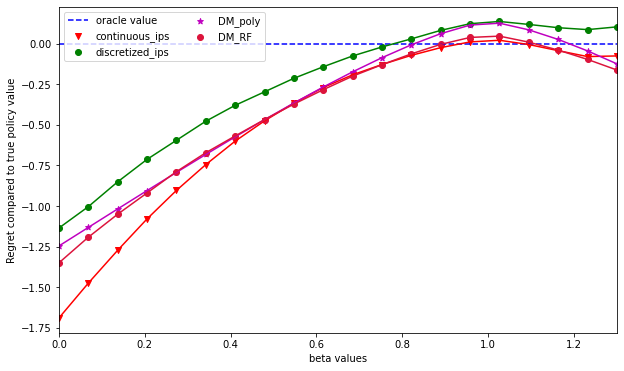

In [42]:
randomized_settings = [
    ('continuous_ips', 'r', 'v'),
    ('discretized_ips', 'g', 'o'),
    ('DM_poly', 'm', '*'),
    ('DM_RF', 'crimson', 'o')
]
see_results(randomized_settings, show_oracle=True)

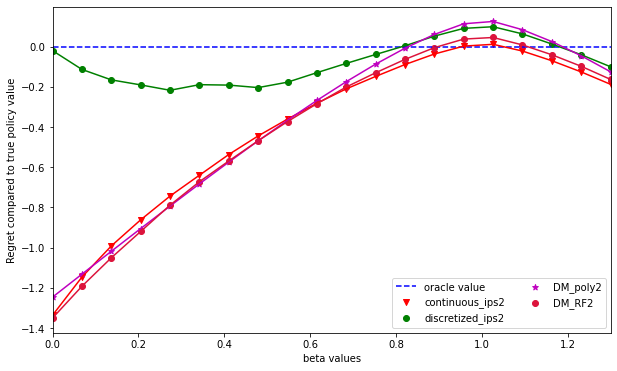

In [43]:
conditional_settings = [
    ('continuous_ips2', 'r', 'v'),
    ('discretized_ips2', 'g', 'o'),
    ('DM_poly2', 'm', '*'),
    ('DM_RF2', 'crimson', 'o')
]
see_results(conditional_settings, show_oracle=True)